In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
img = cv2.imread("kidred.jpg", cv2.IMREAD_COLOR)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
imgOut = img.copy()
eyesCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
eyes = eyesCascade.detectMultiScale(img,scaleFactor=1.3, minNeighbors=4, minSize=(100, 100))

In [14]:
for (x, y, w, h) in eyes:
  eye = img[y:y+h, x:x+w]
  b = eye[:, :, 0]
  g = eye[:, :, 1]
  r = eye[:, :, 2]
  bg = cv2.add(b, g)
  mask = (r > 150) &  (r > bg)
  mask = mask.astype(np.uint8)*255

In [15]:
def fillHoles(mask):
    maskFloodfill = mask.copy()
    h, w = maskFloodfill.shape[:2]
    maskTemp = np.zeros((h+2, w+2), np.uint8)
    cv2.floodFill(maskFloodfill, maskTemp, (0, 0), 255)
    mask2 = cv2.bitwise_not(maskFloodfill)
    return mask2 | mask

In [16]:
mask = fillHoles(mask)
mask = cv2.dilate(mask, None, anchor=(-1, -1), iterations=3, borderType=1, borderValue=1)

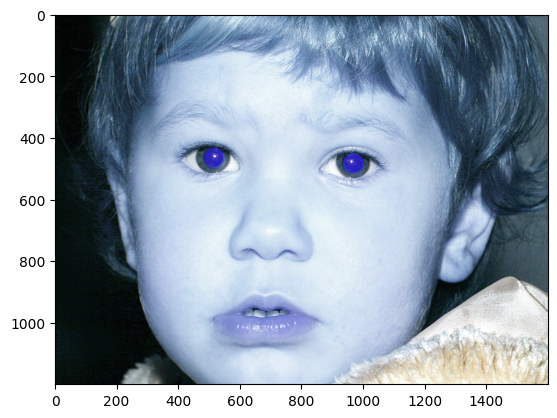

In [11]:
plt.imshow(imgOut)